# Telco Data Visualization in R

In [5]:
# Load libraries
library(tidyverse)
library(lubridate)
library(ggplot2)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




In [6]:
# Read file
df <- read_csv('telco_customer.csv')

Rows: 7043 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): customerID, gender, Partner, Dependents, PhoneService, MultipleLin...
dbl  (4): SeniorCitizen, tenure, MonthlyCharges, TotalCharges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
head(df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


## Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

In [13]:
# Grouping data using dplyr
dg <- df %>% 
    group_by(PaymentMethod) %>% 
    summarise(MonthlyCharges = mean(MonthlyCharges)) %>%
    arrange(desc(MonthlyCharges))

dg

PaymentMethod,MonthlyCharges
<chr>,<dbl>
Electronic check,76.25581
Bank transfer (automatic),67.19265
Credit card (automatic),66.51239
Mailed check,43.91706


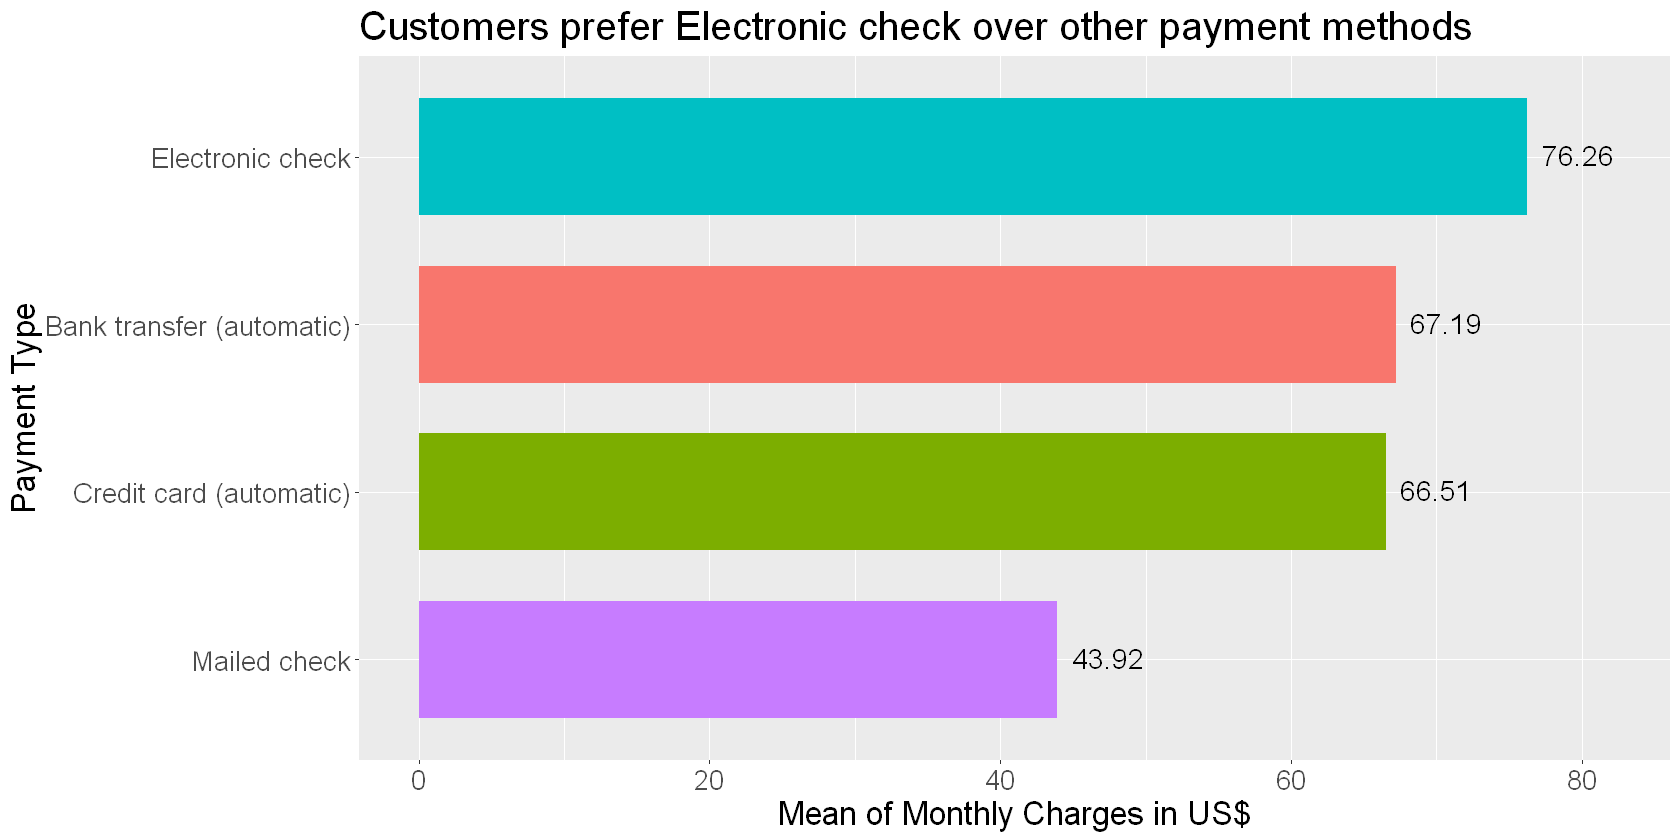

In [67]:
options(repr.plot.width=14, repr.plot.height=7)
ggplot(dg, aes(x=MonthlyCharges, y=reorder(PaymentMethod, MonthlyCharges), fill=PaymentMethod)) +
    geom_bar(stat = "identity", width=0.7) + 
    geom_text(aes(label=round(MonthlyCharges, digits = 2)), hjust=-0.2, vjust=0.4, size=6)+
    labs(x = "Mean of Monthly Charges in US$", y="Payment Type") + 
    xlim(0, 82) + 
    ggtitle("Customers prefer Electronic check over other payment methods") +
    theme(text = element_text(size = 20)) + 
    theme(legend.position = "none")

## Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 hari
- medium_tenure: User dengan tenure 21 - 40 hari
- high_tenure: User dengan tenure > 40 hari

In [77]:
# Create New Column 'TenureGroup'
dtg <- df %>% 
  mutate(TenureGroup = case_when(
    tenure < 21 ~ 'Low',
    tenure > 40 ~ 'High',
    (tenure <= 40 & tenure >= 21) ~ 'Medium'
  ))

# Calculate count of each group
dtgcount <- dtg %>%
  count(TenureGroup)

# Define the order of group
dtgcount$TenureGroup = factor(dtgcount$TenureGroup, levels = c("Low", "Medium", "High"))
dtgcount

TenureGroup,n
<fct>,<int>
High,2757
Low,2878
Medium,1408


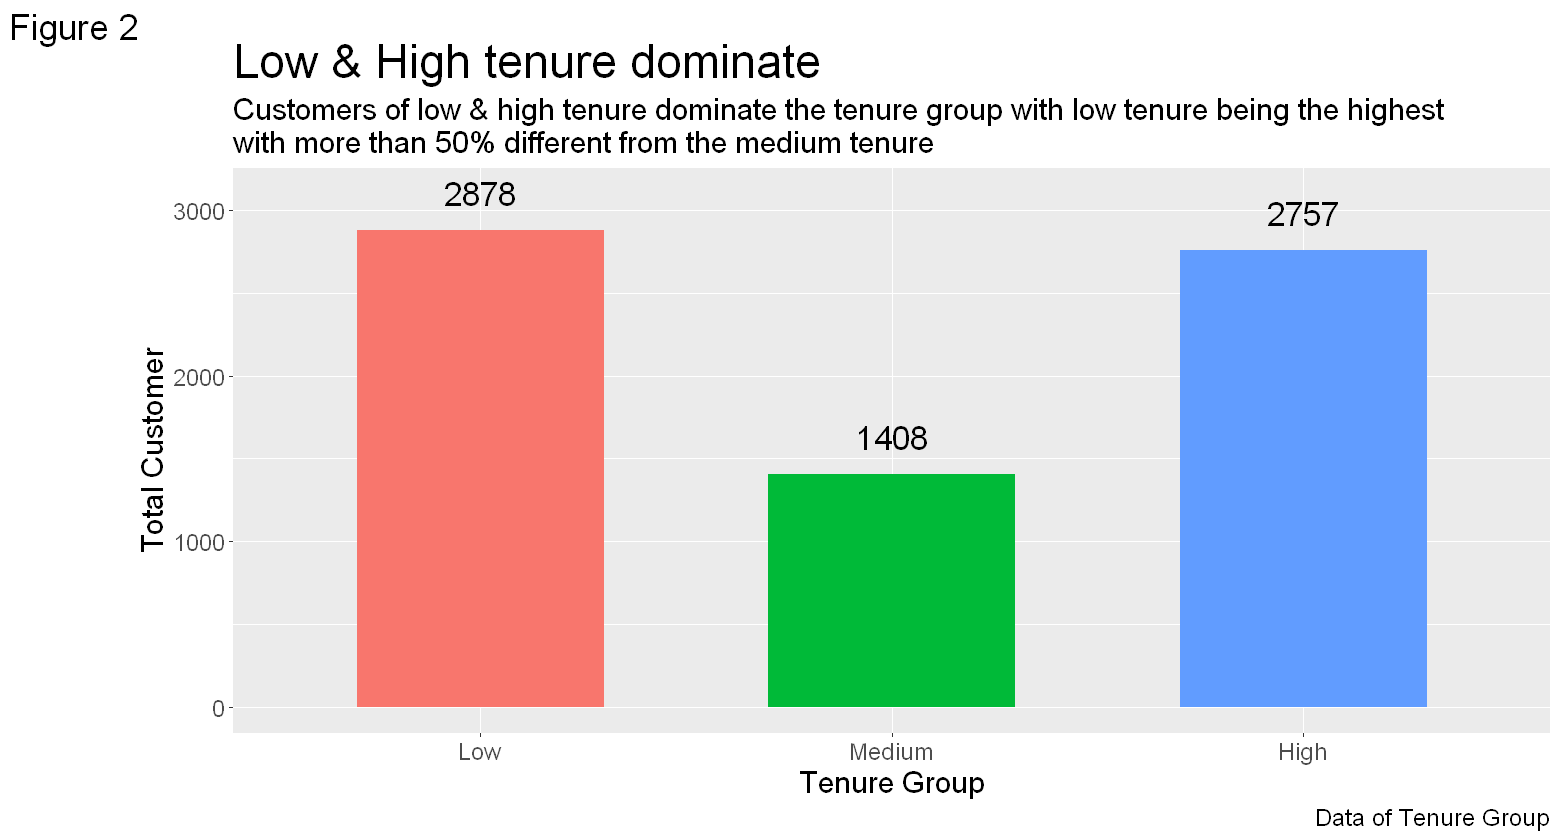

In [137]:
options(repr.plot.width=13, repr.plot.height=7)
ggplot(dtgcount, aes(x=TenureGroup, y=n, fill=TenureGroup)) +
    geom_bar(stat = "identity", width=0.6) +
    geom_text(aes(label=n, hjust=0.5, vjust=-1), size = 7) +
    ylim(0, 3100) +  
    labs(title = "Low & High tenure dominate",
        subtitle = "Customers of low & high tenure dominate the tenure group with low tenure being the highest 
with more than 50% different from the medium tenure",
        caption = "Data of Tenure Group",
        tag = "Figure 2",
        x = "Tenure Group",
        y = "Total Customer"
    )  + 
    theme(text = element_text(size = 18)) +
    theme(legend.position = "none",
        plot.title = element_text(size = 28)
    )

## Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?